In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table
import collections
from spec_tools import Source_present
from matplotlib import gridspec
from astropy.io import fits
from astropy import wcs
import os
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from glob import glob
import seaborn as sea
from grizli import model as griz_model

sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

look for *all* the flt files witn 39170 in them

In [27]:
## test using s39170
RA = 53.041826 
DEC = -27.725868

filelist = glob(hpath + 'Clear_data/s_flt_files/*flt.fits')

flt_files = []
obj_pos =[]
for i in range(len(filelist)):
    pres,pos=Source_present(filelist[i],RA,DEC)
    if pres==True:
        obj_pos.append(pos)
        flt_files.append(filelist[i])

print(flt_files)

['/Users/Vince.ec/Clear_data/s_flt_files/icxt19o6q_flt.fits', '/Users/Vince.ec/Clear_data/s_flt_files/icxt19o7q_flt.fits', '/Users/Vince.ec/Clear_data/s_flt_files/icxt19oaq_flt.fits', '/Users/Vince.ec/Clear_data/s_flt_files/icxt19ocq_flt.fits', '/Users/Vince.ec/Clear_data/s_flt_files/icxt20f7q_flt.fits', '/Users/Vince.ec/Clear_data/s_flt_files/icxt20f8q_flt.fits', '/Users/Vince.ec/Clear_data/s_flt_files/icxt20fbq_flt.fits', '/Users/Vince.ec/Clear_data/s_flt_files/icxt20fdq_flt.fits', '/Users/Vince.ec/Clear_data/s_flt_files/icxt21b7q_flt.fits', '/Users/Vince.ec/Clear_data/s_flt_files/icxt21b8q_flt.fits', '/Users/Vince.ec/Clear_data/s_flt_files/icxt21bcq_flt.fits', '/Users/Vince.ec/Clear_data/s_flt_files/icxt21beq_flt.fits', '/Users/Vince.ec/Clear_data/s_flt_files/icxt22pmq_flt.fits', '/Users/Vince.ec/Clear_data/s_flt_files/icxt22pnq_flt.fits', '/Users/Vince.ec/Clear_data/s_flt_files/icxt22pqq_flt.fits', '/Users/Vince.ec/Clear_data/s_flt_files/icxt22psq_flt.fits', '/Users/Vince.ec/Clear_

In [28]:
obj_pos

[array([-38.70660039, 754.52490851]),
 array([-28.71435828, 758.01555462]),
 array([-32.21176419, 764.5419512 ]),
 array([-42.22170957, 761.05989252]),
 array([-87.01460203, 484.82830068]),
 array([-77.03019901, 488.31423597]),
 array([-80.51919136, 494.84669585]),
 array([-90.53705184, 491.35973919]),
 array([-86.93048826, 484.85416876]),
 array([-76.94583709, 488.3401126 ]),
 array([-80.43509757, 494.87256365]),
 array([-90.45267996, 491.38561485]),
 array([ 58.89492179, 901.87269883]),
 array([ 68.88454963, 905.36881025]),
 array([ 65.38860441, 911.89097472]),
 array([ 55.37544831, 908.41525547]),
 array([ 58.87521163, 901.95730619]),
 array([ 68.86446441, 905.45379865]),
 array([ 65.3702517 , 911.97438721]),
 array([ 55.3570425 , 908.49871579])]

Seperate img files from spec files

In [87]:
imgflt=[]
specflt=[]

for i in range(len(flt_files)):
    indat=fits.open(flt_files[i])
    if indat[0].header['OBSTYPE'] ==  'IMAGING':
        imgflt.append(flt_files[i])
    if indat[0].header['OBSTYPE'] ==  'SPECTROSCOPIC':
        specflt.append(flt_files[i])

In [27]:
imgflt

['/Users/vestrada/Clear_data/flt_files/icxt19o9q_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt19odq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt20faq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt20feq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt21baq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt21bfq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt22ppq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt22ptq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt23pyq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt23q2q_flt.fits']

In [90]:
[print(fits.open(i)[0].header['PA_V3']) for i in specflt]

122.339699
122.339897
122.339798
122.3396
92.340401
92.340591
92.340622
92.340431
92.340401
92.340591
92.340622
92.340431
142.3396
142.339706
142.339706
142.339493
142.3396
142.339706
142.339706
142.339493


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [26]:
for i in range(len(flt_files)):
    indat=fits.open(flt_files[i])
    print(indat[0].header['OBSTYPE'],obj_pos[i])

SPECTROSCOPIC [-38.70660039 754.52490851]
SPECTROSCOPIC [-28.71435828 758.01555462]
IMAGING [-28.6447641  758.02073521]
SPECTROSCOPIC [-32.21176419 764.5419512 ]
SPECTROSCOPIC [-42.22170957 761.05989252]
IMAGING [-42.1892098  761.00556783]
SPECTROSCOPIC [-87.01460203 484.82830068]
SPECTROSCOPIC [-77.03019901 488.31423597]
IMAGING [-76.99219032 488.37041682]
SPECTROSCOPIC [-80.51919136 494.84669585]
SPECTROSCOPIC [-90.53705184 491.35973919]
IMAGING [-90.4725554  491.54600567]
SPECTROSCOPIC [-86.93048826 484.85416876]
SPECTROSCOPIC [-76.94583709 488.3401126 ]
IMAGING [-76.90766262 488.39628668]
SPECTROSCOPIC [-80.43509757 494.87256365]
SPECTROSCOPIC [-90.45267996 491.38561485]
IMAGING [-90.44107418 491.52817958]
SPECTROSCOPIC [ 58.89492179 901.87269883]
SPECTROSCOPIC [ 68.88454963 905.36881025]
IMAGING [ 68.96229513 905.34199648]
SPECTROSCOPIC [ 65.38860441 911.89097472]
SPECTROSCOPIC [ 55.37544831 908.41525547]
IMAGING [ 55.52069747 908.46460959]
SPECTROSCOPIC [ 58.87521163 901.95730619

# Files to exam first

Spectra -

['/Users/vestrada/Clear_data/flt_files/icxt23pzq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt23q1q_flt.fits']

In [2]:
reference_image=hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F125W_orig_sci.fits'
segment_map=hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits'

In [6]:
# initialize
flt = griz_model.GrismFLT(grism_file= hpath + '3dhst/s_flt_files/ibhj07ygq_flt.fits',
                          ref_file=reference_image,seg_file=segment_map,
                            pad=200, ref_ext=0, shrink_segimage=False,force_grism='g141')

/Users/Vince.ec/3dhst/s_flt_files/ibhj07ygq_flt.fits / blot reference /Users/Vince.ec/Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F125W_orig_sci.fits[0]
Using default C-based coordinate transformation...
/Users/Vince.ec/3dhst/s_flt_files/ibhj07ygq_flt.fits / blot segmentation /Users/Vince.ec/Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...


In [7]:
# catalog / semetation image
ref_cat=Table.read(hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat',format='ascii')

seg_cat=flt.blot_catalog(ref_cat,sextractor=False)

In [8]:
flt.compute_full_model(ids=seg_cat['id'], mags=-1)

In [9]:
def Mag(band):
    magnitude=25-2.5*np.log10(band)
    return magnitude

gal_id=26272
obj_mag = Mag(ref_cat['f_F125W'][np.argwhere(ref_cat['id']==gal_id)])

print('ID:%d, mag=%.2f' %(gal_id, obj_mag))

ID:26272, mag=23.06


In [14]:
### Make sure these are initialized
flt.object_dispersers = collections.OrderedDict()
flt.model *= 0

### Compute model of a single object and catch the output, mag=-1 will force compute all orders
single_model = flt.compute_model_orders(id=gal_id, compute_size=True, mag=-1, in_place=False)

## Show it
plt.imshow(single_model[1]*10, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

# plt.scatter(xseg, yseg, marker='o', color='r') # position in direct image

plt.xlim(flt.pad, flt.direct.sh[1]-flt.pad)
plt.ylim(flt.pad, flt.direct.sh[0]-flt.pad)

TypeError: 'bool' object is not subscriptable

In [13]:
single_model

True

In [15]:
## Reset
flt.object_dispersers = collections.OrderedDict()
flt.model *= 0

flt.compute_full_model(ids=seg_cat['id'], mags=-1)
print('Compute full model (%d objects)' %(keep.sum()))

NameError: name 'keep' is not defined

(200, 1214)

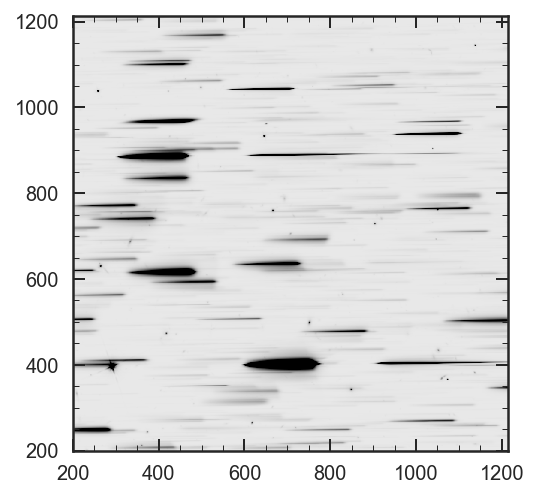

In [25]:
# Full model
plt.imshow(flt.model, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')
plt.xlim(flt.pad, flt.direct.sh[1]-flt.pad)
plt.ylim(flt.pad, flt.direct.sh[0]-flt.pad)

(200, 1214)

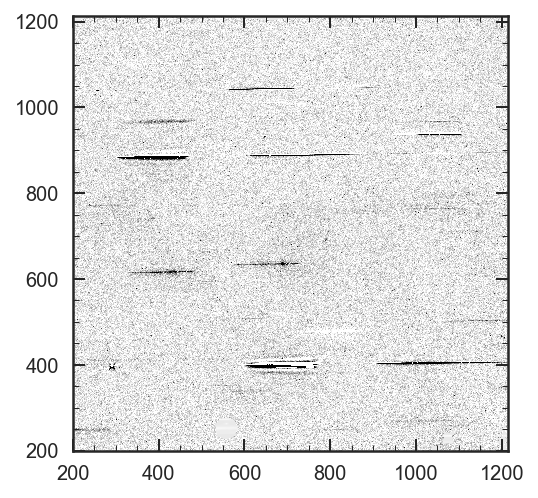

In [96]:
# residual# residu 
plt.imshow(flt.grism.data['SCI'] - flt.model, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')
plt.xlim(flt.pad, flt.direct.sh[1]-flt.pad)
plt.ylim(flt.pad, flt.direct.sh[0]-flt.pad)
# Note, some spectra on the left side of the image aren't modeled because they fall off of 
# the direct image.  This can be accounted for when using reference mosaics that cover areas 
# larger than the FLT frames themselves.

# Also, this is just a crude model with simple (wrong) assumptions about the shapes of the object spectra!

Spectral orders:  (False, None, OrderedDict([('A', <grizli.model.GrismDisperser object at 0x1c6f3dae10>), ('B', <grizli.model.GrismDisperser object at 0x1c6f3dad68>), ('C', <grizli.model.GrismDisperser object at 0x1c6f3da550>), ('D', <grizli.model.GrismDisperser object at 0x1c6f3dae48>), ('E', <grizli.model.GrismDisperser object at 0x1c6f3da080>)]))
(64, 124)
(64, 271)


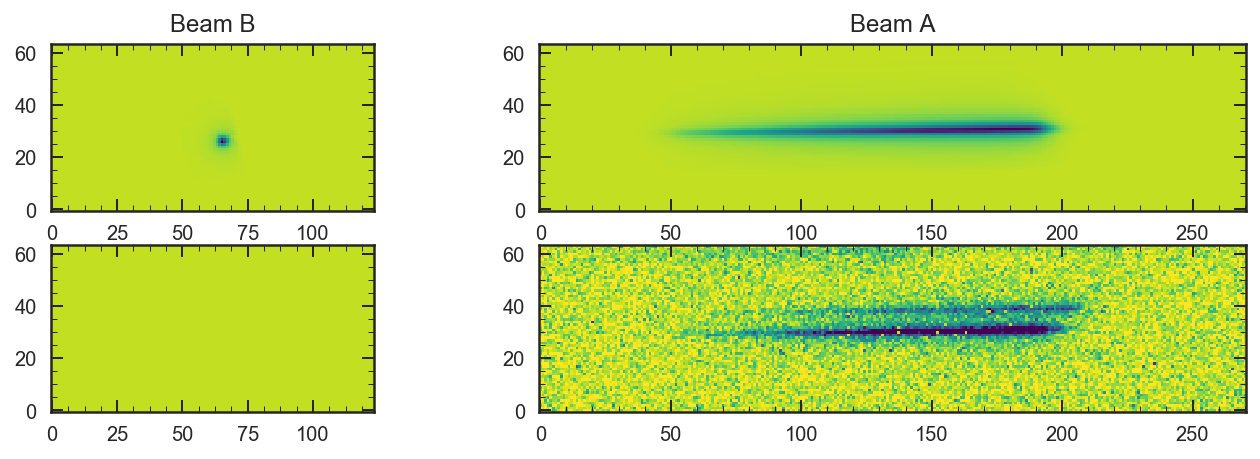

In [97]:
### Get the beams/orders
beams = flt.object_dispersers[gal_id]
print('Spectral orders: ', beams)

### Make a figure showing the model (top) and observed (bottom) spectra
### for the first and zeroth orders.
fig = plt.figure(figsize=[10,3])
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1,3.4],
                       height_ratios=[1,1])

for i, b in enumerate(['B','A']):
    beam = beams[2][b]
    print(beam.sh_beam)
    
    model = beam.compute_model(id=gal_id, spectrum_1d=beam.spectrum_1d, in_place=False)
    vmax = model.max()
    
    #ax = fig.add_subplot(221+i)
    ax = fig.add_subplot(gs[0,i])
    ax.imshow(model.reshape(beam.sh_beam), interpolation='Nearest', origin='lower', cmap='viridis_r', 
              vmin=-0.1*vmax, vmax=vmax)
    
    ax.set_title('Beam %s' %(b))
    
    ### Cutout of observed data
    sci_cutout = beam.cutout_from_full_image(flt.grism.data['SCI'])
    ax = fig.add_subplot(gs[1,i]) #fig.add_subplot(223+i)
    ax.imshow(sci_cutout, interpolation='Nearest', origin='lower', cmap='viridis_r', 
              vmin=-0.1*vmax, vmax=vmax)

fig.tight_layout(pad=0.1)

Available computed beams/orders for id=39170: odict_keys(['A', 'B', 'C', 'D', 'E'])

`beam` class: <class 'grizli.model.GrismDisperser'>

`co` class: <class 'grizli.model.BeamCutout'>

Object 39170, total flux density within the segmentation region: 4.793e-18 erg/s/cm2/A


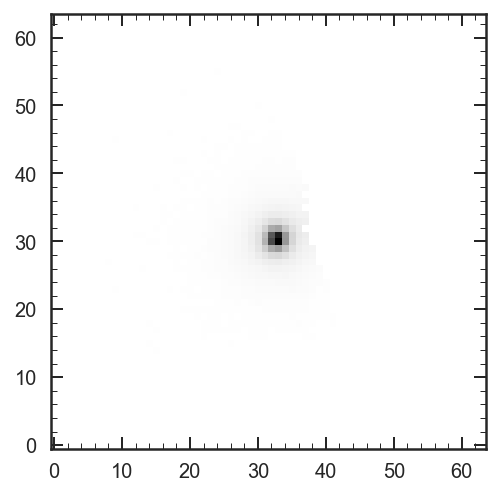

In [98]:
# reload(grizli.model)

print('Available computed beams/orders for id=%d: %s\n' %(gal_id, flt.object_dispersers[gal_id][2].keys()))
beam = flt.object_dispersers[gal_id][2]['A'] # can choose other orders if available
beam.compute_model()
print('`beam` class: %s\n' %(beam.__class__))

### BeamCutout object
co = griz_model.BeamCutout(flt, beam, conf=flt.conf)
print('`co` class: %s\n' %(co.__class__))

print('Object %d, ' %(co.id) +
      'total flux density within the segmentation region: %.3e erg/s/cm2/A'%(co.beam.total_flux))
    
### Show the direct image
plt.imshow(co.beam.direct*(co.beam.seg == gal_id), interpolation='Nearest', cmap='gray_r', origin='lower')

In [99]:
### Can write the BeamCutout object to a normal FITS file
co.write_fits(root='galaxy', clobber=True)

## The direct image extensions have EXTNAME=1 (e.g., ('SCI',1)) and
## the grism extensions have EXTNAME=2

im = fits.open('galaxy_%05d.g102.A.fits' %(gal_id))
fits.setval('galaxy_%05d.g102.A.fits' %(gal_id), 'EXPTIME', value=im[1].header['EXPTIME'], ext=0)

print(im[0].header.cards)
print(im.info())

## Can initialize a BeamCutout object from the FITS file 
## independent of the `flt` and `beam` objects as above.
co2 = griz_model.BeamCutout(fits_file='galaxy_%05d.g102.A.fits' %(gal_id))

#test
print('Flux is the same?: %.2e %.2e' %(co.beam.total_flux, co2.beam.total_flux))

('SIMPLE', True, 'conforms to FITS standard')
('BITPIX', 8, 'array data type')
('NAXIS', 0, 'number of array dimensions')
('EXTEND', True, '')
('ID', 39170, 'Object ID')
('PAD', 200, 'Padding of input image')
('BEAM', 'A', 'Grism order ("beam")')
('XCENTER', -0.2565101074340532, 'Offset of centroid wrt thumb center')
('YCENTER', 0.4750289026439987, 'Offset of centroid wrt thumb center')
('TYOFFSET', 0, 'Cross dispersion offset of the trace')
('GPARENT', '/Users/vestrada/Clear_data/flt_files/icxt23q1q_flt.fits', 'Parent gri')
('DPARENT', '/Users/vestrada/Clear_data/flt_files/icxt23q1q_flt.fits', 'Parent dir')
('FWCPOS', '', 'Filter wheel position (NIRISS)')
('MW_EBV', 0.0, 'Milky Way exctinction E(B-V)')
Filename: galaxy_39170.g102.A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  SCI           1 ImageHDU       195   (64, 64)   float32   
  2  ERR           1 ImageHDU       195   (64, 64)   float32   
  3  DQ    

In [48]:
co2 = griz_model.BeamCutout(fits_file='../beams/o142_1_39170.g102.A.fits')


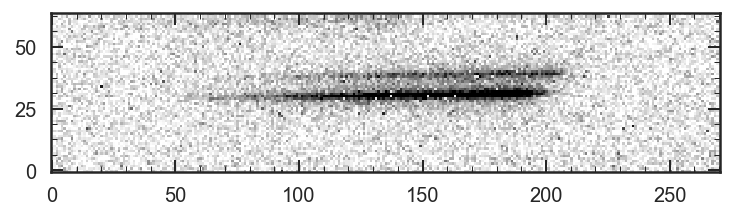

In [100]:
# Show the spectrum cutout
plt.imshow(co.grism.data['SCI'], interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

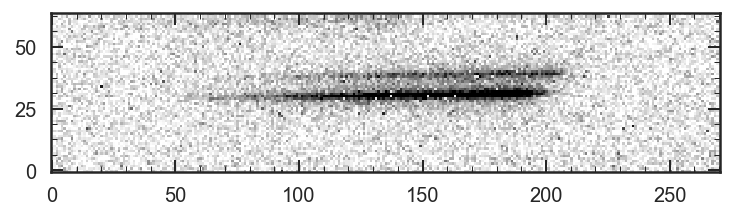

In [108]:
# Show the spectrum cutout
plt.imshow(co2.grism.data['SCI'], interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

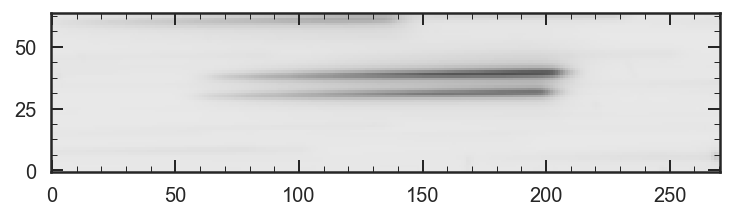

In [101]:
# Show the contamination model, which was cutout of `flt.model`
plt.imshow(co.contam, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

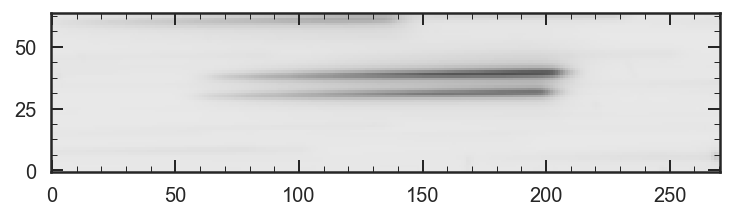

In [109]:
# Show the contamination model, which was cutout of `flt.model`
plt.imshow(co2.contam, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

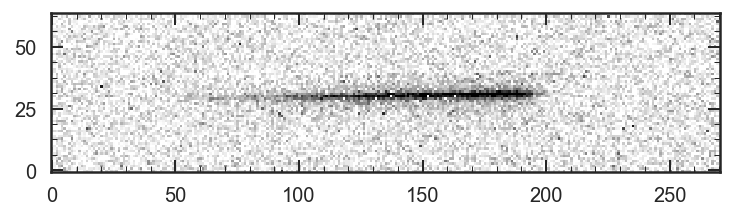

In [102]:
# Show the spectrum cutout - contam
plt.imshow(co.grism.data['SCI'] - co.contam, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

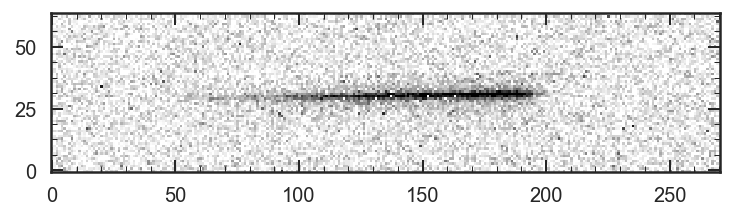

In [110]:
# Show the spectrum cutout - contam
plt.imshow(co2.grism.data['SCI'] - co2.contam, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

In [103]:
xspec, yspec, yerr = co.beam.optimal_extract(co.grism.data['SCI'], bin=0, ivar=co.ivar) #data

In [111]:
xspec, yspec, yerr = co2.beam.optimal_extract(co2.grism.data['SCI'], bin=0, ivar=co2.ivar) #data

In [104]:
swv, sens = [co.beam.lam, co.beam.sensitivity / np.max(co.beam.sensitivity)]
isens = interp1d(swv, sens)(xspec)


In [113]:
swv, sens = [co2.beam.lam, co2.beam.sensitivity / np.max(co2.beam.sensitivity)]
isens = interp1d(swv, sens)(xspec)

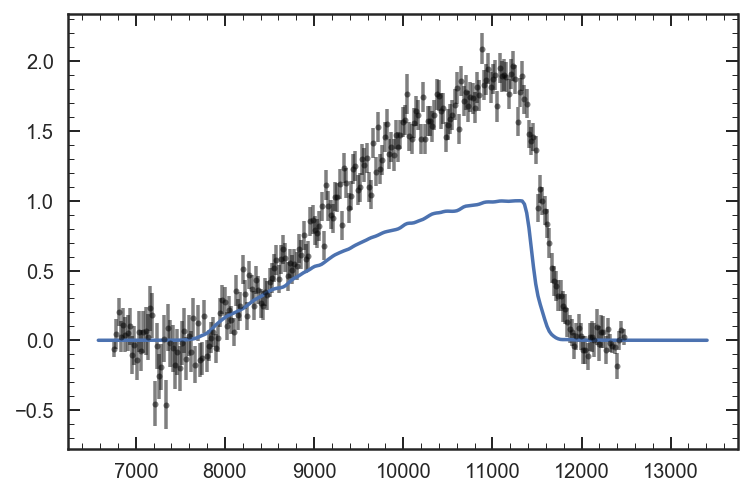

In [114]:
plt.errorbar(xspec, yspec, yerr, linestyle='None', marker='o', markersize=3, color='black', 
             alpha=0.5, label='Data (id=%d)' %(co.beam.id))
plt.plot(xspec,isens)

In [106]:
IDX= [U for U in range(len(xspec)) if 8000 < xspec[U] <11400]

<ErrorbarContainer object of 3 artists>

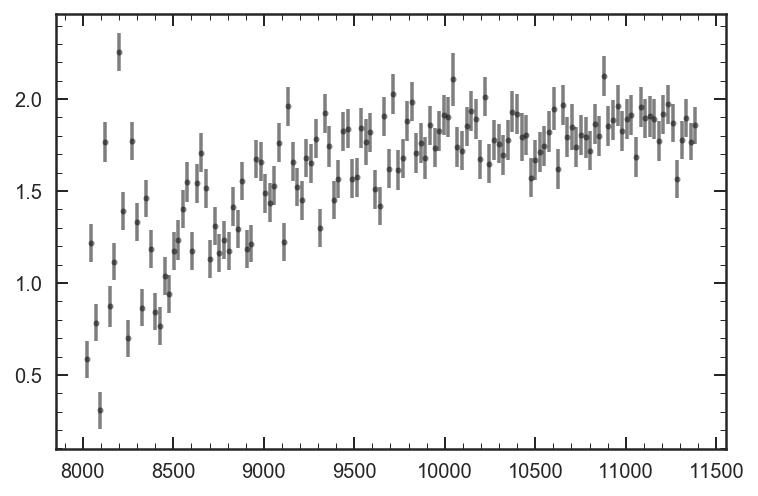

In [107]:
plt.errorbar(xspec[IDX], yspec[IDX] / isens[IDX], yerr[IDX], linestyle='None', marker='o', markersize=3, color='black', 
             alpha=0.5, label='Data (id=%d)' %(co.beam.id))

In [14]:
def Mag(band):
    magnitude=25-2.5*np.log10(band)
    return magnitude

def Gen_beam_fits(mosiac, seg_map, grism_data, catalog, gal_id, orient_id, grism = 'G102'):
    # initialize
    flt = griz_model.GrismFLT(grism_file = grism_data,
                          ref_file = mosiac, seg_file = seg_map,
                            pad=200, ref_ext=0, shrink_segimage=False,force_grism = grism)
    
    # catalog / semetation image
    ref_cat = Table.read( catalog ,format='ascii')
    seg_cat = flt.blot_catalog(ref_cat,sextractor=False)
    
    ## Reset
    flt.object_dispersers = collections.OrderedDict()

    flt.compute_full_model(ids=seg_cat['id'], mags=-1)

    # reload(grizli.model)
    beam = flt.object_dispersers[gal_id][2]['A'] # can choose other orders if available
    beam.compute_model()

    ### BeamCutout object
    co = griz_model.BeamCutout(flt, beam, conf=flt.conf)

    ### Write the BeamCutout object to a normal FITS file
    orient = int(fits.open(grism_data)[0].header['PA_V3'])
    
    co.write_fits(root='../beams/o{0}_{1}'.format(orient,orient_id), clobber=True)
    fits.setval('../beams/o{0}_{1}_{2}.g102.A.fits'.format(orient, orient_id, gal_id), 'EXPTIME', ext=0,
                value=fits.open('../beams/o{0}_{1}_{2}.g102.A.fits'.format(orient, orient_id, gal_id))[1].header['EXPTIME'])

In [15]:
Gen_beam_fits(hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F125W_orig_sci.fits',
             hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits',
             hpath + 'Clear_data/flt_files/icxt23q1q_flt.fits',
             hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat',
             39170,1)

/Users/Vince.ec/Clear_data/flt_files/icxt23q1q_flt.fits / blot reference /Users/Vince.ec/Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F125W_orig_sci.fits[0]
Using default C-based coordinate transformation...
/Users/Vince.ec/Clear_data/flt_files/icxt23q1q_flt.fits / blot segmentation /Users/Vince.ec/Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...


In [1]:
print('done')

done


In [2]:
reference_image=hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F125W_orig_sci.fits'
segment_map=hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits'
print('done')
# initialize
flt = griz_model.GrismFLT(grism_file= hpath + '3dhst/s_flt_files/ibhj01iqq_flt.fits',
                          ref_file=reference_image,seg_file=segment_map,
                            pad=200, ref_ext=0, shrink_segimage=True,force_grism='G141')
print('done')
# catalog / semetation image
ref_cat=Table.read(hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat',format='ascii')
print('done')
seg_cat=flt.blot_catalog(ref_cat,sextractor=False)

done


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:1461: RuntimeWarning: invalid value encountered in less
  bad = self.data['SCI'] < sigma*self.data['ERR']


Image cutout: x=slice(497, 5975, None), y=slice(14905, 19700, None) [Out of range]
/Users/vestrada/3dhst/s_flt_files/ibhj01iqq_flt.fits / blot reference /Users/vestrada/Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F125W_orig_sci.fits[0]
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       imagefindpars           mapreg              photeq       
     pixreplace           pixtopix            pixtosky        refimagefindpars  
     resetbits          runastrodriz          skytopix           tweakback      
      tweakreg           updatenpol
Using default C-based coordinate transformation...
Image cutout: x=slice(497, 5975, None), y=slice(14905, 19700, None) [Out of range]
/Users/vestrada/3dhst/s_flt_files/ibhj01iqq_flt.fits / Pad ref HDU with 718 pixels
/Users/vestrada/3dhst/s_flt_files/ibhj01iqq_flt.fit

True


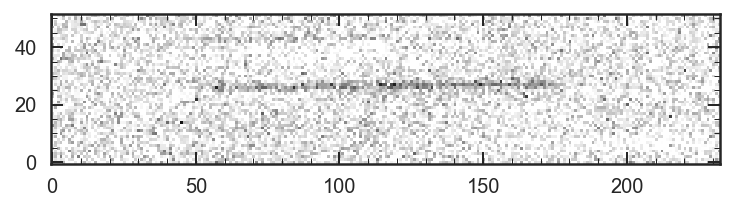

In [3]:
def Mag(band):
    magnitude=25-2.5*np.log10(band)
    return magnitude

gal_id=46345

## Reset
flt.object_dispersers = collections.OrderedDict()

flt.compute_full_model(ids=seg_cat['id'], mags=26)

# reload(grizli.model)

print(gal_id in flt.object_dispersers.keys())

beam = flt.object_dispersers[gal_id][2]['A'] # can choose other orders if available
beam.compute_model()

### BeamCutout object
co = griz_model.BeamCutout(flt, beam, conf=flt.conf)

### Can write the BeamCutout object to a normal FITS file
# co.write_fits(root='galaxy', clobber=True)
# fits.setval('galaxy_%05d.g102.A.fits' %(gal_id), 'EXPTIME', value=im[1].header['EXPTIME'], ext=0)

# Show the spectrum cutout - contam
plt.imshow(co.grism.data['SCI'] - co.contam, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

In [31]:
xspec, yspec, yerr = co.beam.optimal_extract(co.grism.data['SCI'], bin=0, ivar=co.ivar) #data

In [50]:
swv, sens = [co2.beam.lam, co2.beam.sensitivity / np.max(co2.beam.sensitivity)]
# isens = interp1d(swv, sens)(xspec)

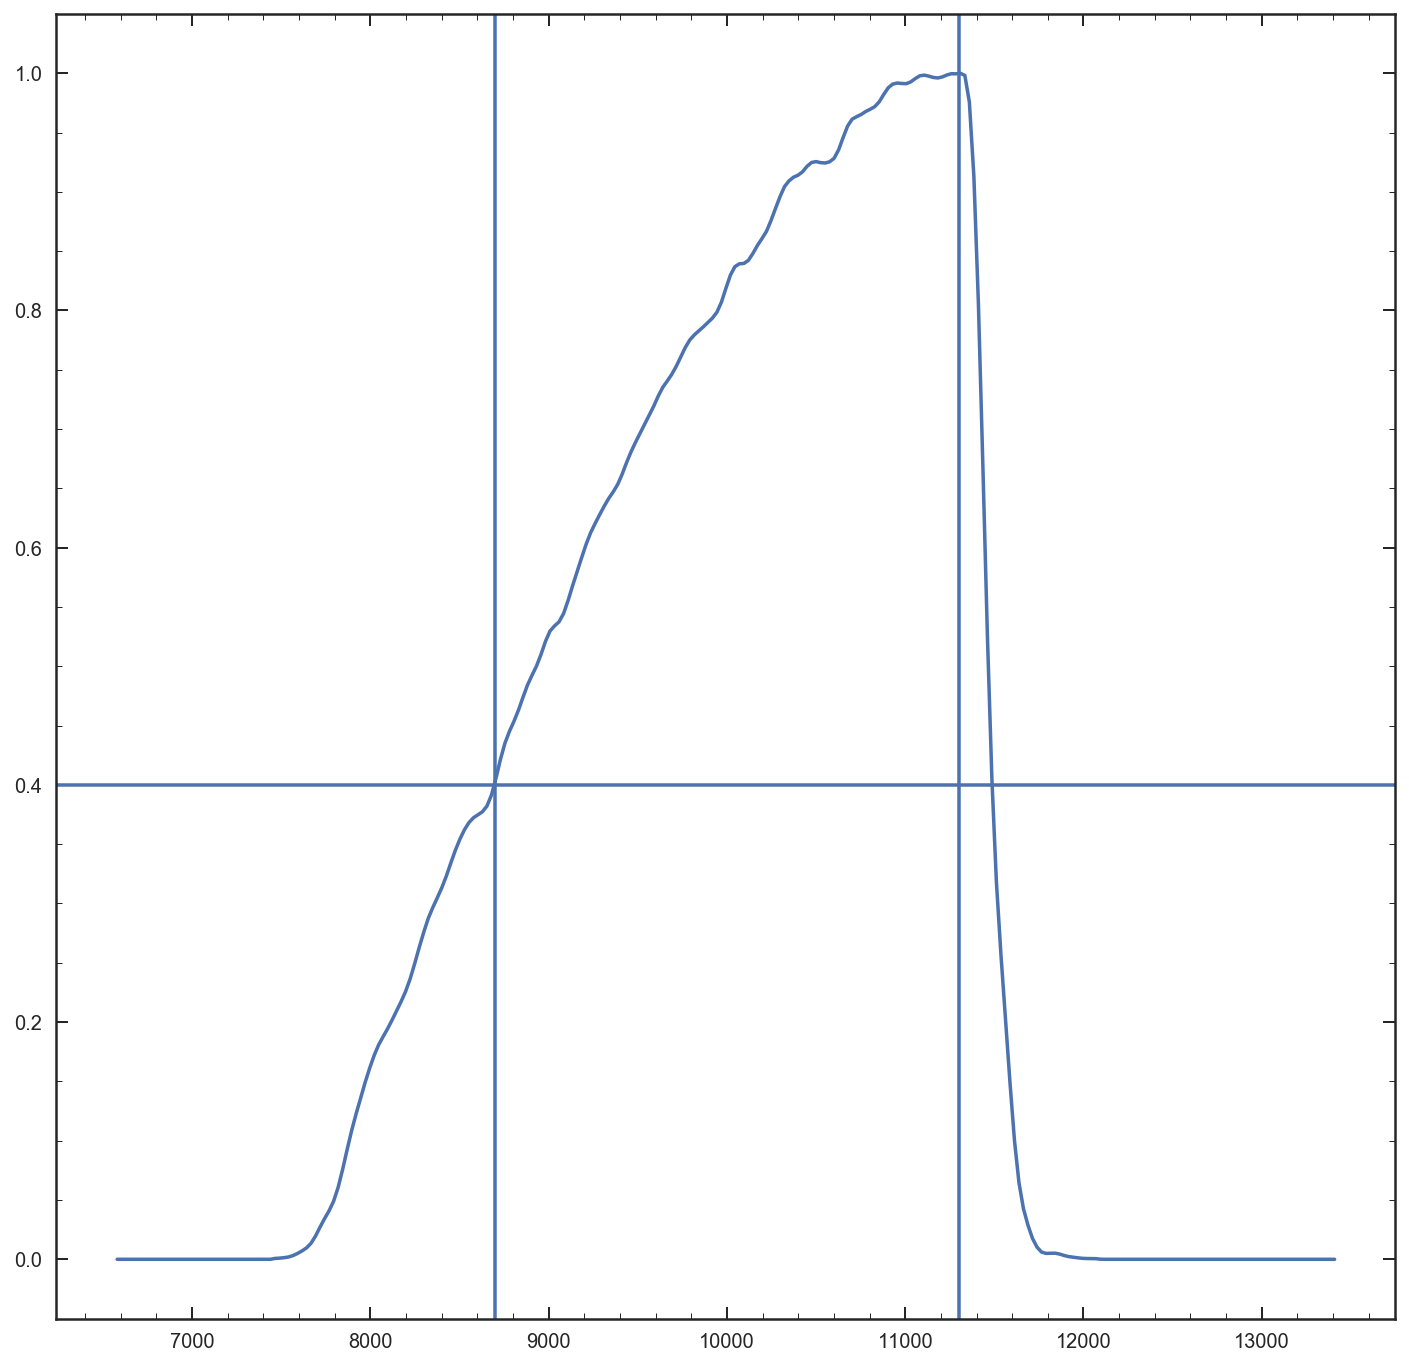

In [60]:
plt.figure(figsize=[12,12])
plt.plot(swv,sens)
plt.axhline(.4)
plt.axvline(11300)
plt.axvline(8700)